1. Import all packages and load the data from csv

Importing Libraries

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Step 1: Load the raw dataset
import pandas as pd

df = pd.read_csv('telecom_dataset.csv')

print(df)

     Customer ID  Gender  Senior Citizen Partner Dependents  Tenure  \
0     7590-VHVEG  Female               0     Yes         No       1   
1     5575-GNVDE    Male               0      No         No      34   
2     3668-QPYBK    Male               0      No         No       2   
3     7795-CFOCW    Male               0      No         No      45   
4     9237-HQITU  Female               0      No         No       2   
...          ...     ...             ...     ...        ...     ...   
7038  6840-RESVB    Male               0     Yes        Yes      24   
7039  2234-XADUH  Female               0     Yes        Yes      72   
7040  4801-JZAZL  Female               0     Yes        Yes      11   
7041  8361-LTMKD    Male               1     Yes         No       4   
7042  3186-AJIEK    Male               0      No         No      66   

     Phone Service    Multiple Lines Internet Service Online Security  ...  \
0               No  No phone service              DSL              No

 2: Examine the data for missing values, duplicates, and outliers

In [17]:
# Step 2: Examine the data for missing values, duplicates, and outliers

print("Missing Values:")
print(df.isnull().sum())

print("\nDuplicates:")
print(df.duplicated().sum())

Missing Values:
Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

Duplicates:
0


3. Address duplicates, if any, and remove unnecessary columns

In [22]:
# Step 3 Remove the customer ID column
format_df = df.drop(columns=['Customer ID'])
print(format_df)

      Gender  Senior Citizen Partner Dependents  Tenure Phone Service  \
0     Female               0     Yes         No       1            No   
1       Male               0      No         No      34           Yes   
2       Male               0      No         No       2           Yes   
3       Male               0      No         No      45            No   
4     Female               0      No         No       2           Yes   
...      ...             ...     ...        ...     ...           ...   
7038    Male               0     Yes        Yes      24           Yes   
7039  Female               0     Yes        Yes      72           Yes   
7040  Female               0     Yes        Yes      11            No   
7041    Male               1     Yes         No       4           Yes   
7042    Male               0      No         No      66           Yes   

        Multiple Lines Internet Service Online Security Online Backup  \
0     No phone service              DSL           

4. Encode categorical variables (e.g., one-hot encoding) for modeling purposes.

In [25]:
# Step 4: Encode categorical variables (one-hot encoding)

# A sample DataFrame
data = {'gender': ['Male', 'Female', 'Male', 'Female', 'Male']}
format_df = pd.DataFrame(data)

# Perform one-hot encoding for the 'gender' column
encode_format_df = pd.get_dummies(format_df, columns=['gender'], prefix=['Gender'])

# Replacing 'Male' with 1 and 'Female' with 0 in the 'Gender' column
encode_format_df['Gender'] = format_df['gender'].map({'Male': 1, 'Female': 0})

# Print the cleaned DataFrame
print(encode_format_df)





   Gender_Female  Gender_Male  Gender
0          False         True       1
1           True        False       0
2          False         True       1
3           True        False       0
4          False         True       1


In [27]:
# Removing 'Gender' columns after merging
encode_format_df = encode_format_df.drop(['Gender_Male', 'Gender_Female'], axis=1)

# Print the cleaned DataFrame
print(encode_format_df)


   Gender
0       1
1       0
2       1
3       0
4       1


In [29]:
# # Merge encode_df with df 
merged_df = pd.concat([encode_format_df, format_df], axis=1)
merged_df

,Gender,gender
0,1,Male
1,0,Female
2,1,Male
3,0,Female
4,1,Male


In [30]:
#Step 7: Perform descriptive statistics

summary_stats = merged_df.describe()
print(summary_stats)

         Gender
count  5.000000
mean   0.600000
std    0.547723
min    0.000000
25%    0.000000
50%    1.000000
75%    1.000000
max    1.000000


In [3]:
# Print the list of column names in the DataFrame
print(data.columns)


Index(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')


 Step 8 Explore the distribution of key variables, such as customer demographics(age, gender), usage patterns(monthly charges,total charges),and churn status. 

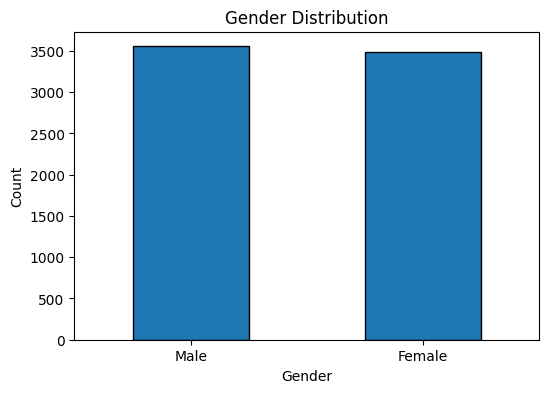

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset into a DataFrame (actual data file)
data = pd.read_csv('telecom_dataset.csv')


# Group the data by 'gender' and calculate counts
gender_counts = data['Gender'].value_counts()

# Create a bar plot for gender distribution
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=0)  # To prevent rotation of x-axis labels
plt.show()





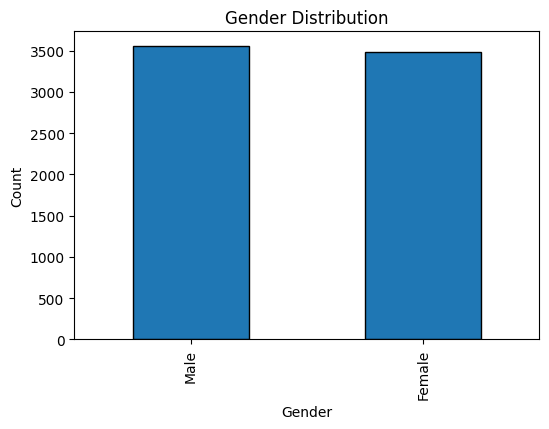

In [9]:
# Gender distribution using Bar plot

plt.figure(figsize=(6, 4))
data['Gender'].value_counts().plot(kind='bar', edgecolor='k')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


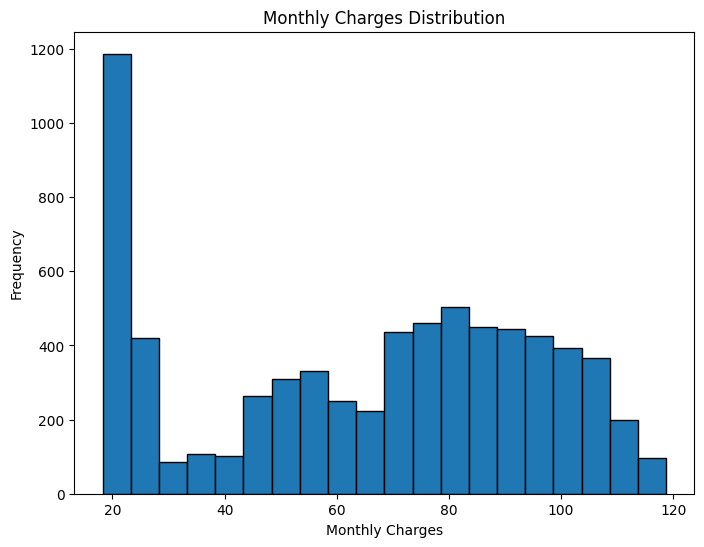

In [11]:
# Usage Patterns (Monthly Charges and Total Charges)

# Histogram for Monthly Charges
plt.figure(figsize=(8, 6))
plt.hist(data['Monthly Charges'], bins=20, edgecolor='k')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution')
plt.show()


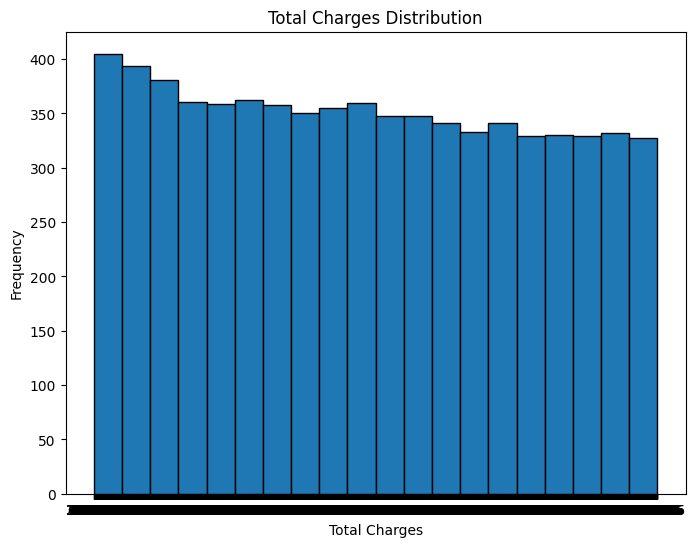

In [13]:
# Histogram for Total Charges
plt.figure(figsize=(8, 6))
plt.hist(data['Total Charges'], bins=20, edgecolor='k')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Total Charges Distribution')
plt.show()

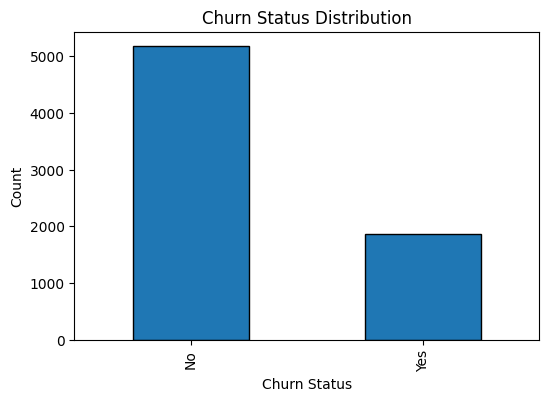

In [14]:
# Distributionof churn status using bar plot

plt.figure(figsize=(6, 4))
data['Churn'].value_counts().plot(kind='bar', edgecolor='k')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Status Distribution')
plt.show()

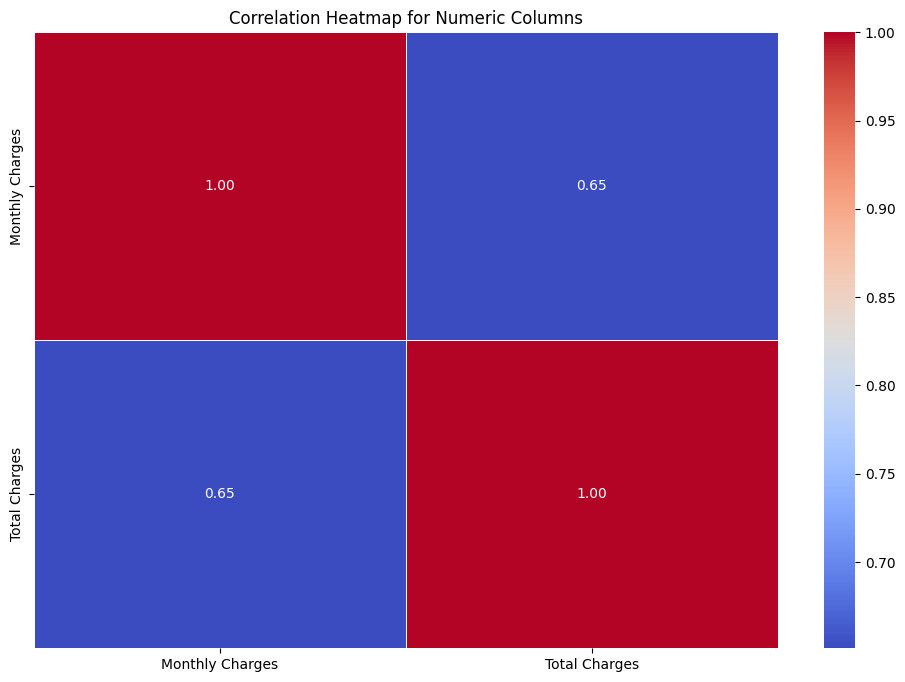

In [18]:
#  Step 9 Calculate and visualize correlations between variables using a heatmap.

# Convert empty strings or spaces in 'Monthly Charges' and 'Total Charges' to zeros
data['Monthly Charges'] = data['Monthly Charges'].replace(' ', 0).astype(float)
data['Total Charges'] = data['Total Charges'].replace(' ', 0).astype(float)

# calculate the correlation matrix
numeric_data = data[['Monthly Charges', 'Total Charges']].copy()
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Columns')
plt.show()


In [23]:
# Step 10 Conduct hypothesis tests (e.g.,t-tests) to compare differences between churned and non-churned customers


import scipy.stats as stats

# Separating churned and non-churned customers
churned = data[data['Churn'] == 'Yes']['Monthly Charges']
non_churned = data[data['Churn'] == 'No']['Monthly Charges']

# Perform a two-sample t-test assuming unequal variances
t_statistic, p_value = stats.ttest_ind(churned, non_churned, equal_var=False)

# Determine statistical significance
if p_value < 0.05:
    print("There is a statistically significant difference between churned and non-churned customers.")
else:
    print("There is no statistically significant difference between churned and non-churned customers.")


There is a statistically significant difference between churned and non-churned customers.


Step 11 Create summary tables and statistics for various customer segments (e.g.,by contract type, payment method).

In [29]:
# Group the data by contract type and calculate summary statistics for numeric columns
contract_summary = data.groupby('Contract')[['Monthly Charges', 'Total Charges']].agg(['mean', 'median', 'std', 'count']).reset_index()

# Rename the columns for clarity
contract_summary.columns = ['Contract', 
                            'Mean Monthly Charges', 'Median Monthly Charges', 
                            'Std Monthly Charges', 'Count Monthly Charges', 
                            'Mean Total Charges', 'Median Total Charges', 
                            'Std Total Charges', 'Count Total Charges']

# Display the summary table for contract types
print("Summary Statistics by Contract:")
print(contract_summary)




Summary Statistics by Contract:
         Contract  Mean Monthly Charges  Median Monthly Charges  \
0  Month-to-month             66.398490                   73.25   
1        One year             65.048608                   68.75   
2        Two year             60.770413                   64.35   

   Std Monthly Charges  Count Monthly Charges  Mean Total Charges  \
0            26.926599                   3875         1369.254581   
1            31.840539                   1473         3032.622878   
2            34.678865                   1695         3706.934336   

   Median Total Charges  Std Total Charges  Count Total Charges  
0                679.55        1613.879008                 3875  
1               2656.70        2230.374581                 1473  
2               3593.80        2579.517834                 1695  


In [30]:
# Group the data by contract type and calculate summary statistics for numeric columns
contract_summary = data.groupby('Payment Method')[['Monthly Charges', 'Total Charges']].agg(['mean', 'median', 'std', 'count']).reset_index()

# Rename the columns for clarity
contract_summary.columns = ['Payment Method', 
                            'Mean Monthly Charges', 'Median Monthly Charges', 
                            'Std Monthly Charges', 'Count Monthly Charges', 
                            'Mean Total Charges', 'Median Total Charges', 
                            'Std Total Charges', 'Count Total Charges']

# Display the summary table for Payment Method
print("Summary Statistics by Payment Method:")
print(contract_summary)

Summary Statistics by Payment Method:
              Payment Method  Mean Monthly Charges  Median Monthly Charges  \
0  Bank transfer (automatic)             67.192649                  73.100   
1    Credit card (automatic)             66.512385                  73.025   
2           Electronic check             76.255814                  80.550   
3               Mailed check             43.917060                  34.700   

   Std Monthly Charges  Count Monthly Charges  Mean Total Charges  \
0            30.555200                   1544         3075.310816   
1            30.612424                   1522         3069.378022   
2            24.053655                   2365         2090.868182   
3            26.314665                   1612         1049.250744   

   Median Total Charges  Std Total Charges  Count Total Charges  
0              2472.775        2358.810261                 1544  
1              2445.950        2407.898470                 1522  
2              1253.900    

Step 12: Generate Insightful Visualizations

C:\Users\USER.DESKTOP-BID4V60.000\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER.DESKTOP-BID4V60.000\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER.DESKTOP-BID4V60.000\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


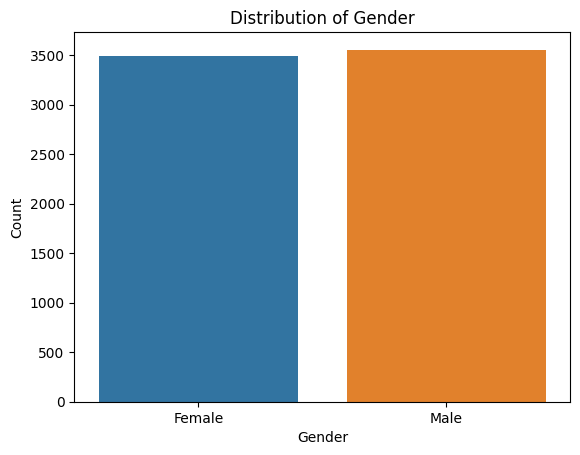

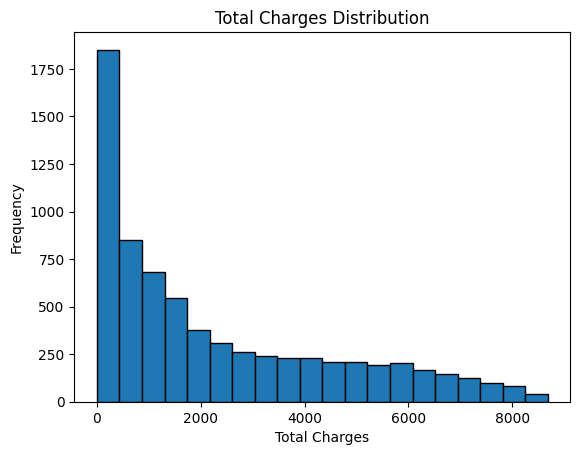

In [32]:
# A - Bar plots and histograms to show distribution of categorical and numeric variables. 

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for a categorical variable (e.g., 'Gender')
sns.countplot(x='Gender', data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

# Histogram for a numeric variable (e.g., 'Totoal Charges)
plt.hist(data['Total Charges'], bins=20, edgecolor='k')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Total Charges Distribution')
plt.show()




C:\Users\USER.DESKTOP-BID4V60.000\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER.DESKTOP-BID4V60.000\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER.DESKTOP-BID4V60.000\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


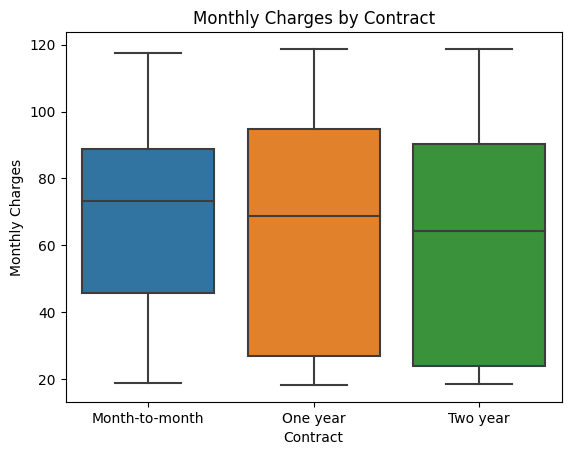

In [34]:
# B - Box plots to identify outliers

sns.boxplot(x='Contract', y='Monthly Charges', data=data)
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Contract')
plt.show()




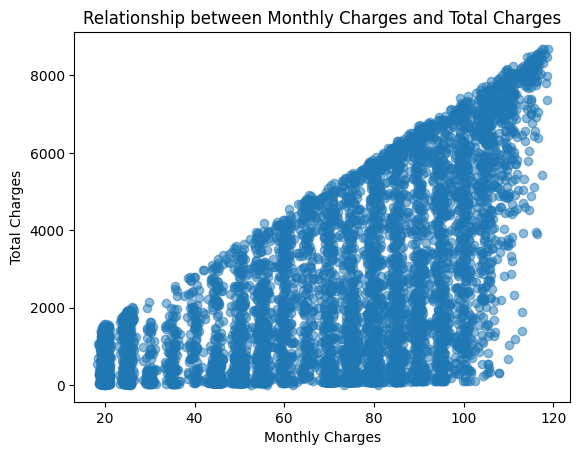

In [35]:
# C - Scatter plots to explore relationships between numeric variables. 

plt.scatter(data['Monthly Charges'], data['Total Charges'], alpha=0.5)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Relationship between Monthly Charges and Total Charges')
plt.show()


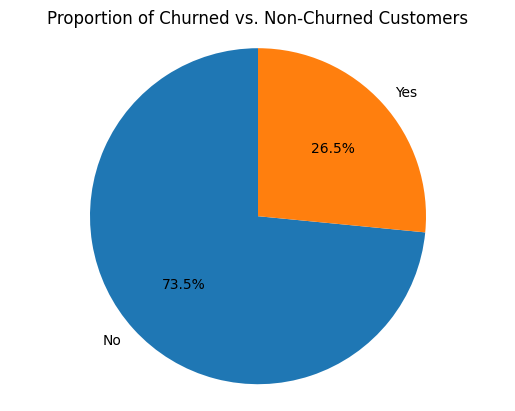

In [36]:
# D - Pie charts to visualize the pro portion of churned vs.non-churned customers. 

churn_counts = data['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Proportion of Churned vs. Non-Churned Customers')
plt.show()


Step 13: Use Visualization Libraries

Step 15: Summarize key in sights and findings from the visualizations.
